# Unexpected Seaborn: Gotcha-s and Tips

## Introduction

I was playing with Seaborn a little while ago, and ran into a few "gotchas".  Now, these were gotchas for me, due to a faulty model as to how Seaborn works, but I thought I would chat about them in case others also have faulty model. 

## Notebook Setup

Load utility to display the environment , and my formatter

In [71]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [72]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


All imports go here

In [73]:
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

## Using Seaborn

Set the default Seaborn style as the default

In [74]:
sns.set()

List Seaborn in-built datasets. I   am sure that if I updated my Seaborn and / or BeautifulSoup packages via ```conda```, the warning message would go away(?).

In [75]:
sns.get_dataset_names()

D:\Anaconda3\envs\ac5-py37\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file D:\Anaconda3\envs\ac5-py37\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

Load a dataset that we can play with

In [76]:
data = sns.load_dataset(name='tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
## Gotcha 1: Axes Styles

The code below is WRONG (just in case somebody decides to cut and paste it).

My mental model was that the ```axes_style``` call applied to subsequent plotting operations with a given axes obect.

Thus, I was very surprised that all five styles (as show below) came out exactly the same.  I must admit I stared for quiet a while trying to find subtle differences.

Text(0.5, 0.98, 'Seaborn Styles')

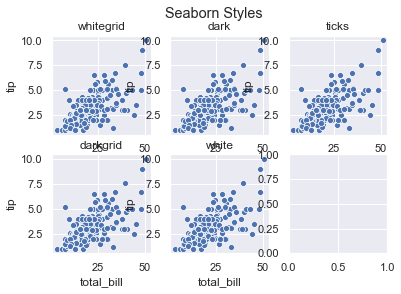

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=3)


with sns.axes_style("whitegrid"):

    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax[0, 0]
    )
    ax[0, 0].set_title('whitegrid')
# end with

with sns.axes_style("darkgrid"):

    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax[1, 0]
    )
    ax[1, 0].set_title('darkgrid')
# end with

with sns.axes_style("dark"):

    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax[0, 1]
    )
    ax[0, 1].set_title('dark')
# end with

with sns.axes_style("white"):

    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax[1, 1]
    )
    ax[1, 1].set_title('white')
# end with

with sns.axes_style("ticks"):

    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax[0, 2]
    )
    ax[0, 2].set_title('ticks')
# end with

fig.suptitle('Seaborn Styles')

In fact, the ```axes_style``` call sets the properties of Axes objects created after the call.

The appropriate strategy is to create a Figure object, and ***after*** the ```axes_style``` call, create a new Axes object, and add it to the Figure object.

Text(0.5, 0.98, 'Seaborn Styles')

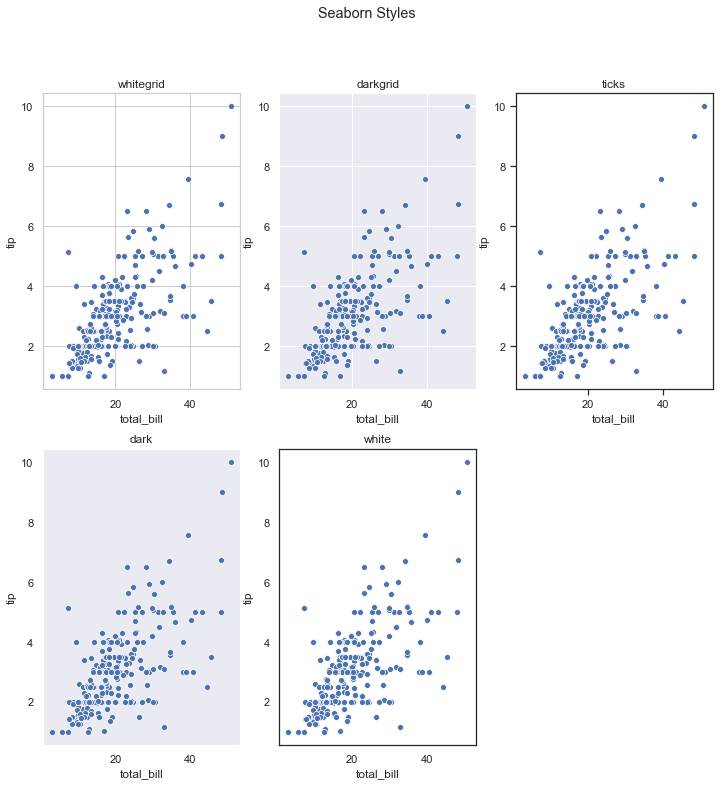

In [78]:
fig = plt.figure(figsize=(12, 12))

gs = fig.add_gridspec(2, 3)

with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(gs[0, 0])
    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax
    )
    ax.set_title('whitegrid')
# end with

with sns.axes_style("darkgrid"):
    ax = fig.add_subplot(gs[0, 1])
    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax
    )
    ax.set_title('darkgrid')
# end with

with sns.axes_style("dark"):
    ax = fig.add_subplot(gs[1, 0])
    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax
    )
    ax.set_title('dark')
# end with

with sns.axes_style("white"):
    ax = fig.add_subplot(gs[1, 1])
    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax
    )
    ax.set_title('white')
# end with

with sns.axes_style("ticks"):
    ax = fig.add_subplot(gs[0, 2])
    sns.scatterplot(
        x='total_bill', y='tip', data=data, ax=ax
    )
    ax.set_title('ticks')
# end with

fig.suptitle('Seaborn Styles')

---
## Gotcha 2: Set_Context

The code below is WRONG.  I had assumed that because setting an Axes style was a context manager operation, so setting a Seaborn Context would be done through a context manager too.

In [79]:
fig = plt.figure(figsize=(12, 12))

gs = fig.add_gridspec(2, 2)

with sns.set_context("paper"):
    ax = fig.add_subplot(gs[0, 0])
    sns.scatterplot(x='total_bill', y='tip', data=data, ax=ax)
    ax.set_title('paper')
#end with

fig.suptitle('Seaborn Context Settings')

sns.set_context("notebook")

AttributeError: __enter__

<Figure size 864x864 with 0 Axes>

You have to explicitly reset the context after the initial ```set_context``` call

Text(0.5, 0.98, 'Seaborn Context Settings')

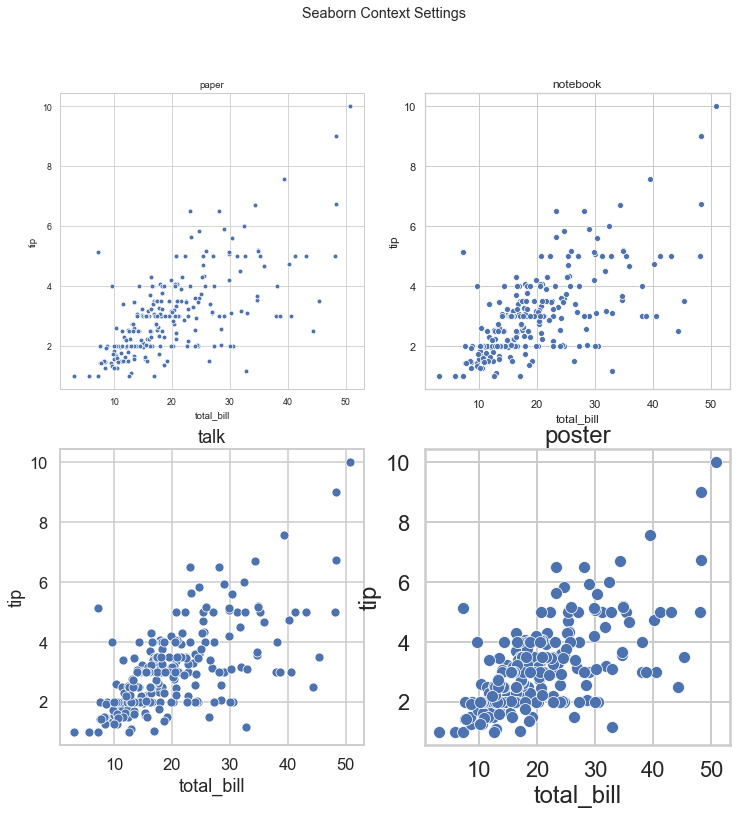

In [86]:
fig = plt.figure(figsize=(12, 12))

gs = fig.add_gridspec(2, 2)

sns.set_context("paper")
ax = fig.add_subplot(gs[0, 0])
sns.scatterplot(x='total_bill', y='tip', data=data, ax=ax)
ax.set_title('paper')

sns.set_context("notebook")
ax = fig.add_subplot(gs[0, 1])
sns.scatterplot(x='total_bill', y='tip', data=data, ax=ax)
ax.set_title('notebook')


sns.set_context("talk")
ax = fig.add_subplot(gs[1, 0])
sns.scatterplot(x='total_bill', y='tip', data=data, ax=ax)
ax.set_title('talk')


sns.set_context("poster")
ax = fig.add_subplot(gs[1, 1])
sns.scatterplot(x='total_bill', y='tip', data=data, ax=ax)
ax.set_title('poster')

sns.set_context("notebook")


fig.suptitle('Seaborn Context Settings')

---
## Useful Tricks

### Summary Heatmaps

WE can use ```pandas``` to get some nice Seaborn graphics.  Suppose we want to learn the distribution on tables sizes across days of the week.

The ```pandas``` snippet below counts the number of tables by party size, for each week day  (we should probably rename the ```total_bill``` column, as it is really a count)

In [87]:
data2 = (
    data.groupby(by=['size', 'day'])['total_bill']
    .count()
    .reset_index()
)

data2.head()

,size,day,total_bill
0,1,Thur,1
1,1,Fri,1
2,1,Sat,2
3,1,Sun,0
4,2,Thur,48


We can now create a pivot table on day of week

In [88]:
data3 = data2.pivot(
    index='size', columns='day', values='total_bill'
)
data3.head()

day,Thur,Fri,Sat,Sun
size,,,,
1,1,1,2,0
2,48,16,53,39
3,4,1,18,15
4,5,1,13,18
5,1,0,1,3


Now display it with Seaborn

Text(0.5, 1.0, 'Count of party size by day of week')

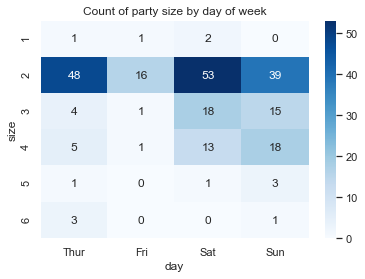

In [89]:
ax = sns.heatmap(data3, annot=True, cmap='Blues')
ax.set_title('Count of party size by day of week')

We can also do the same trick to find the total revue by party size and day of week

Text(0.5, 1.0, 'Revenue by party size by day of week')

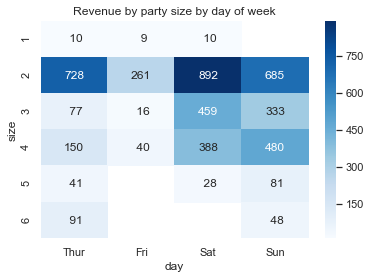

In [90]:
data2 = (
    data.groupby(by=['size', 'day'])['total_bill']
    .sum()
    .reset_index()
)


data3 = data2.pivot(
    index='size', columns='day', values='total_bill'
)


ax = sns.heatmap(
    data3, annot=True, cmap='Blues', fmt='3.0f'
)
ax.set_title('Revenue by party size by day of week')

Note the format specification: by default, Seaborn uses scientific notation for floats

----
### More Heatmaps Tips

We create an array with a gradient, and random (normal) noise, and then display the result as a heatmap

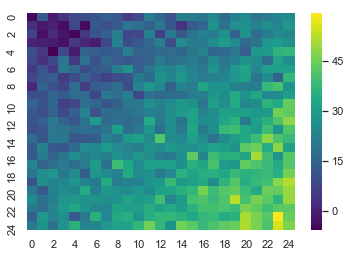

In [91]:
ndata = [
    [i + j + np.random.normal(0, 5) for i in range(25)]
    for j in range(25)
]
sns.heatmap(ndata, cmap='viridis')

We can change the style of the heatmap: in the example below, we strip off the x and y axis labels, and set a shading style that de-emphasises the sharp edges.  Non-standard shading seems to expose the underlying default grey background, so we set style as ```whitegrid```

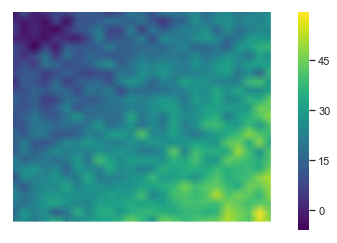

In [92]:
sns.set_style("whitegrid")
sns.heatmap(
    ndata,
    cmap='viridis',
    shading='gouraud',
    xticklabels=False,
    yticklabels=False,
)

We can also go for a square aspect ratio, and reduce the size of the colorbar

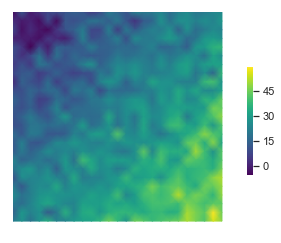

In [93]:
sns.heatmap(
    ndata,
    cmap='viridis',
    shading='gouraud',
    xticklabels=False,
    yticklabels=False,
    square=True,
    cbar_kws={'shrink': 0.5},
)

----
## Environment


In [94]:
%watermark -h -iv
%watermark

numpy      1.15.4
matplotlib 3.0.2
seaborn    0.9.0
host name: DESKTOP-SODFUN6
2020-06-03T15:23:29+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
